In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### STEP 1
Download the bike-sharing-demand dataset:
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2024 Spring/ML/Lecture 8/SeoulBikeData.csv', encoding='latin1')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Seasons'] = le.fit_transform(df['Seasons'])
df['Holiday'] = le.fit_transform(df['Holiday'])
df['Functioning Day'] = le.fit_transform(df['Functioning Day'])


### STEP 2
Pick a number of features that you think may be correlated to each other and plot pairs of them to confirm that they are correlated.

<ipython-input-86-a305a192ff6b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(df.corr(), vmin=0, vmax=1, annot=True, color='Red')


<Axes: >

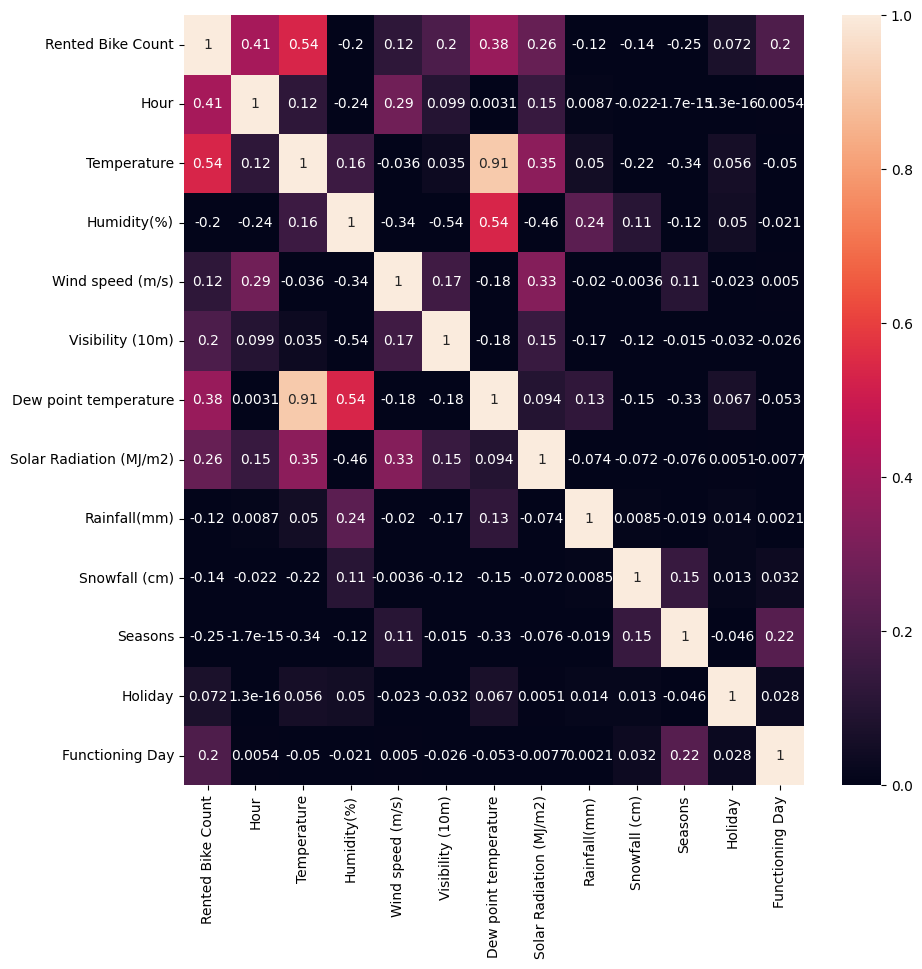

In [ ]:
from seaborn import heatmap

plt.figure(figsize=(10,10))
heatmap(df.corr(), vmin=0, vmax=1, annot=True, color='Red')

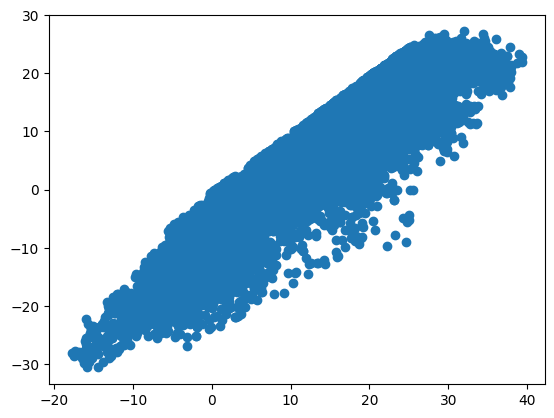

In [ ]:
x = df['Temperature']
y = df['Dew point temperature']

plt.scatter(x, y)
plt.show()

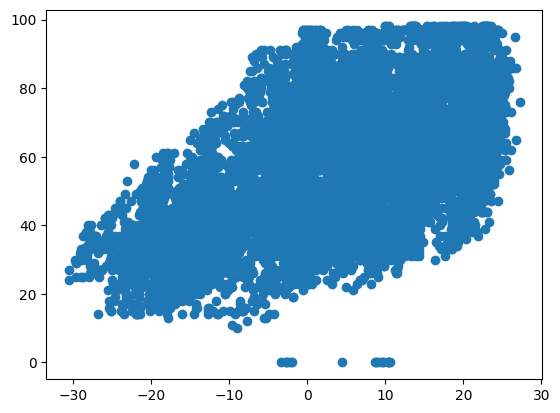

In [ ]:
x = df['Dew point temperature']
y = df['Humidity(%)']

plt.scatter(x, y)
plt.show()

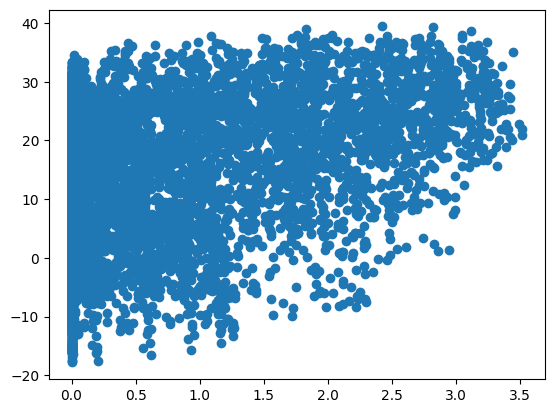

In [ ]:
x = df['Solar Radiation (MJ/m2)']
y = df['Temperature']

plt.scatter(x, y)
plt.show()

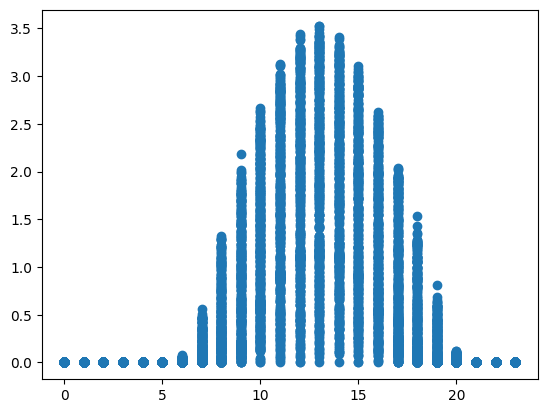

In [ ]:
x = df['Hour']
y = df['Solar Radiation (MJ/m2)']

plt.scatter(x, y)
plt.show()

### STEP 3
Pick several features that you think might be correlated with the demand (rented bike count) and plot to confirm that they are correlated.

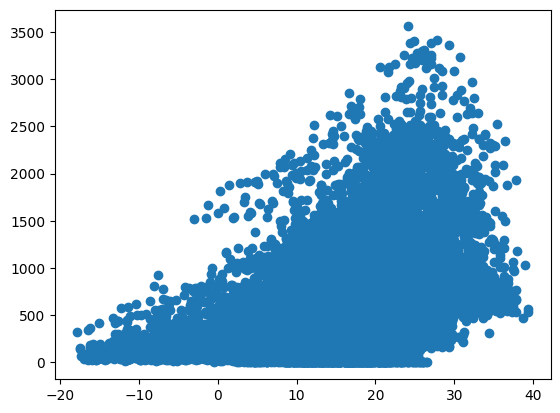

In [ ]:
x = df['Temperature']
y = df['Rented Bike Count']

plt.scatter(x, y)
plt.show()

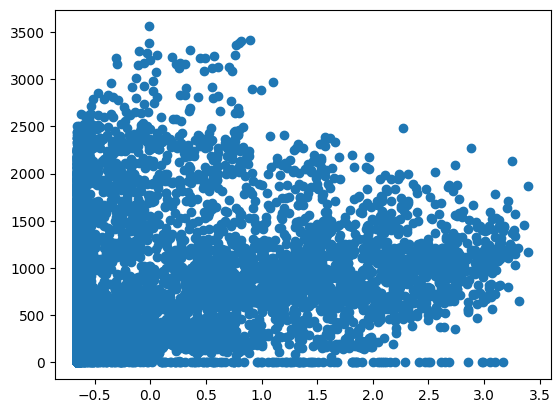

In [ ]:
x = df['Solar Radiation (MJ/m2)']
y = df['Rented Bike Count']

plt.scatter(x, y)
plt.show()

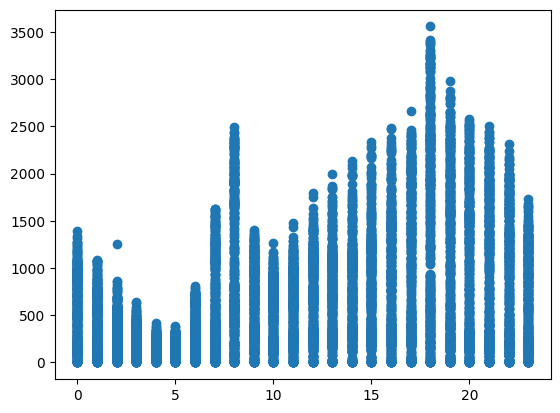

In [ ]:
x = df['Hour']
y = df['Rented Bike Count']

plt.scatter(x, y)
plt.show()

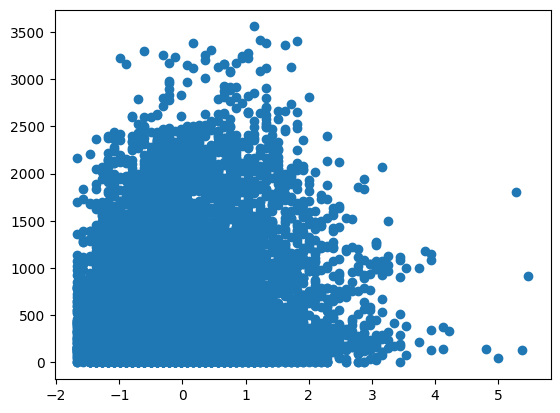

In [ ]:
x = df['Wind speed (m/s)']
y = df['Rented Bike Count']

plt.scatter(x, y)
plt.show()

### STEP 4
Separate the data into training, validation, and test sets.

In [ ]:
y = df['Rented Bike Count']
X = df.drop(['Rented Bike Count', 'Date'], axis = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### STEP 5 & 6
Apply Linear regression and Random Forest regression methods to predict rented bike count using Scikit learn. Quantify how good a job each method did in predicting the value of the dependent variable (using your test data set). Discuss why you believe each method performed as it did.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

R2 Score = 0.5321983228467896 
Mean Square Error = 194907.80877958232 
Mean Absolute Error = 330.12656980771857



Text(0.5, 1.0, 'Ground Truth vs Predicted - Linear Regression')

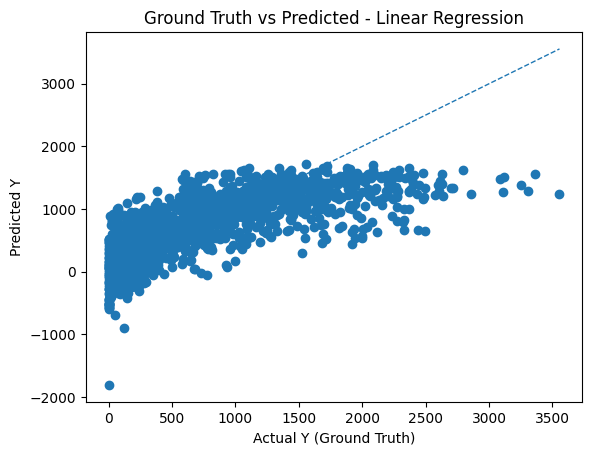

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_hat = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

print(f"R2 Score = {r2} \nMean Square Error = {mse} \nMean Absolute Error = {mae}\n")

fig, ax = plt.subplots()
ax.scatter(y_test, y_hat)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=1)
ax.set_xlabel('Actual Y (Ground Truth)')
ax.set_ylabel('Predicted Y')
ax.set_title("Ground Truth vs Predicted - Linear Regression")

R2 Score = 0.8569921190257287 
Mean Square Error = 59583.69557058619 
Mean Absolute Error = 146.9904160958904



Text(0.5, 1.0, 'Ground Truth vs Predicted - Random Forest Regression')

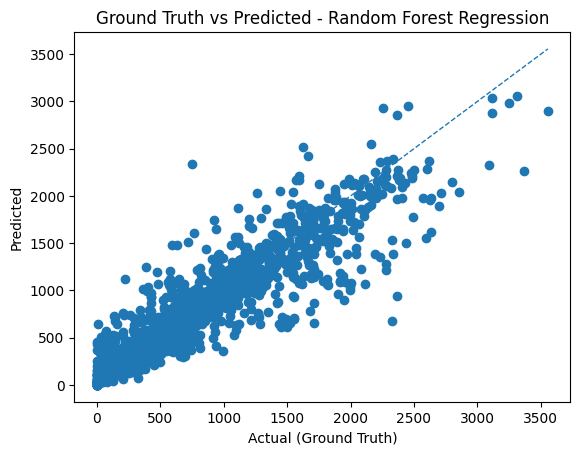

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

print(f"R2 Score = {r2} \nMean Square Error = {mse} \nMean Absolute Error = {mae}\n")

fig, ax = plt.subplots()
ax.scatter(y_test, y_hat)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=1)
ax.set_xlabel('Actual (Ground Truth)')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted - Random Forest Regression")

### STEP 7
Upload your .ipynb file to Brightspace. Include your discussions (Step 6.) in either a Word or pdf file or (preferably) in a cell (or cells) in your notebook with your code.

In the outcome, Random Forest Regression performs better than Linear Regression for this dataset.

In Linear Regression, the predicted y has 12 coefficients and 1 intercept in the multivariate space, but not all features exhibit a linear relationship with the target. The linear model may not adequately capture the underlying complexity and non-linearities present in the data.

Random Forest Regression captures non-linear relationship since it is an ensemble model based on multiple decision trees. Each tree only uses a subset of the data for training, thus making it less susceptible to the influence of outliers and noise.


Three different methods have been employed to assess the performance: R², MSE, and MAE. R² provides an overall measure of model performance in explaining variance, while MSE and MAE offer insights into the magnitude of errors between predictions and actual values.

R², the default scoring metric in scikit-learn, ranges between 0 and 1. It signifies the proportion of the variance in the dependent variable explained by the model. To compute R², the sum of squares of the differences between the predicted and true values is normalized by dividing by the total sum of squares, which is essentially the variance of the true values.

$$R2 = 1 - MSE / Var(y_{true}) $$

MSE (Mean Squared Error) and MAE (Mean Absolute Error) are both loss functions used in regression tasks. MSE places greater emphasis on large errors due to squaring, which amplifies their impact in the calculation. Consequently, it is often preferred when training models with Stochastic Gradient Descent (SGD) because it provides strong signals for updating the weights.

$$ MAE = mean(abs(y_{pred} - y_{true})) $$
$$ MSE = mean((y_{pred} - y_{true})^2) $$